# **Customer Segmentation project**
## **TO GRANT OR NOT TO GRANT**


## Context

The project aims to create a multiclass classification model to predict the Claim Injury Type based on claims data from the New York Workers' Compensation Board (WCB) between 2020 and 2022. This model will help automate the decision-making process regarding compensation, which is currently done manually and is time-consuming.

## Expected outcomes

The project expects to create a multiclass classification model that accurately predicts the Claim Injury Type based on claims data provided by the New York Workers' Compensation Board (WCB). By automating the decision-making process for these claims, the model will reduce the time and effort spent on manual review. The expected outcomes include:

*   **Accurate prediction** of the type of injury (Claim Injury Type) using a benchmark model.
*   **Model optimization**, including fine-tuning and hyper-parameter adjustments to improve performance.
*   **Additional insights**, such as feature importance analysis and exploring alternative variables (e.g., WCB Decision or Agreement Reached) to further enhance the model.






## Column Name Descriptions


*   **Accident Date**: Injury date of the claim.
*   **Age at Injury**: Age of injured worker when the injury occurred.
*   **Alternative Dispute Resolution**:Adjudication processes external to the Board.
*   **Assembly Date**: The date the claim was first assembled.
*   **Attorney/Representative**: Is the claim being represented by an Attorney?
*   **Average Weekly Wage:** The wage used to calculate workers’ compensation,disability, or an Paid Leave wage replacement benefits.
*   **Birth Year:** The reported year of birth of the injured worker.
*   **C-2 Date:** Date of receipt of the Employer's Report of Work-Related, Injury/Illness or equivalent (formerly Form C-2).
*   **C-3 Date:** Date Form C-3 (Employee Claim Form) was received.
*   **Carrier Name:** Name of primary insurance provider responsible for
providing workers’ compensation coverage to the injured
worker’s employer.
*   **Carrier Type:** Type of primary insurance provider responsible for providing
workers’ compensation coverage.
*   **Claim Identifier:** Unique identifier for each claim, assigned by WCB.
*   **County of Injury:** Name of the New York County where the injury occurred.
*   **COVID-19 Indicator**: Indication that the claim may be associated with COVID-19.
*   **District Name**: Name of the WCB district office that oversees claims for that region or area of the state.
*   **First Hearing Date:** Date the first hearing was held on a claim at a WCB hearing location. A blank date means the claim has not yet had a hearing held.
Gender: The reported gender of the injured worker.
*   **IME-4 Count:** Number of IME-4 forms received per claim. The IME-4 form is the "Independent Examiner's Report of Independent Medical Examination" form.
*   **Industry Code:** NAICS code and descriptions are available at: https://www.naics.com/search-naics-codes-by-industry/.
*   **Industry Code Description:** 2-digit NAICS industry code description used to classify businesses according to their economic activity.
*   **Medical Fee Region:** Approximate region where the injured worker would receive medical service.
*   **OIICS Nature of Injury Description:** The OIICS nature of injury codes & descriptions are available at https://www.bls.gov/iif/oiics_manual_2007.pdf.
*   **WCIO Cause of Injury Code:** The WCIO cause of injury codes & descriptions are available at https://www.wcio.org/Active%20PNC/WCIO_Cause_Table.pdf.
*   **WCIO Cause of Injury Description:** See description of field above.
*   **WCIO Nature of Injury Code: **The WCIO nature of injury codes are available at https://www.wcio.org/Active%20PNC/WCIO_Nature_Table.pdf.
*   **WCIO Nature of Injury Description: **See description of field above.
*   **WCIO Part Of Body Code**: The WCIO part of body codes & descriptions are available at https://www.wcio.org/Active%20PNC/WCIO_Part_Table.pdf.
*   **WCIO Part Of Body Description:** See description of field above.
*   **Zip Code:** The reported ZIP code of the injured worker’s home address.
*  **Agreement Reached: Binary variable:** Yes if there is an agreement without the involvement of the WCB -> **unknown** at the start of a claim.
*   **WCB Decision:** **Multiclass variable:** Decision of the WCB relative to the claim: "Accident" means that claim refers to workplace accident, "Occupational Disease" means illness from the workplace. -> **requires WCB deliberation** so it is unknown at the start of a claim.
*   **Claim Injury Type:** **Main target variable**: Deliberation of the WCB relative to benefits awarded to the claim. **Numbering indicates severity.**







































# **Libraries and Functions**

### **Import necessary libraries**



In [70]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np
import os

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer
)

## **Functions**

### Read CSV from Google Colab or Local Machine

In [71]:
import pandas as pd
import os

def load_file(file_path_or_sheet_id, sheet_name=None, df_name='data', colab_wd=None):
    """
    Loads data from a Google Sheet in Colab or from a local CSV file otherwise.

    Args:
        file_path_or_sheet_id (str): The path to the local CSV file or the ID of the Google Sheet.
        sheet_name (str, optional): The name of the sheet to load (only for Google Sheets). Defaults to None.
        df_name (str, optional): The name of the DataFrame variable to return. Defaults to 'data'.
        colab_wd (str, optional): The working directory path in Google Colab. Defaults to None.

    Returns:
        pd.DataFrame: The loaded DataFrame.
    """
    # Check if running in Google Colab
    try:
        from google.colab import auth, drive
        auth.authenticate_user()
        import gspread
        from oauth2client.client import GoogleCredentials
        IN_COLAB = True
    except ImportError:
        IN_COLAB = False

    if IN_COLAB:
        print("Detected environment: Google Colab")
        # Always load from Google Sheet if in Colab
        gc = gspread.authorize(GoogleCredentials.get_application_default())
        sheet = gc.open_by_key(file_path_or_sheet_id).worksheet(sheet_name)
        data = sheet.get_all_values()
        globals()[df_name] = pd.DataFrame(data[1:], columns=data[0])
        print(f"Data successfully loaded from Google Sheet: {sheet_name}")
    else:
        print("Detected environment: Local")
        wd = os.getcwd()
        full_path = os.path.join(wd, file_path_or_sheet_id)
        globals()[df_name] = pd.read_csv(full_path)
        print(f"File successfully loaded from: {full_path}")

    return globals()[df_name]

In [72]:
# Code was developed by team so that we can run the code both in Google Colab
# and on the local machine without much hassle

def load_file(filename, df_name, colab_wd=None):
    """
    Loads and extracts a CSV file depending on the environment: Google Colab or local machine.
    The DataFrame is stored with the name provided by the df_name argument.

    Arguments:
    filename -- The name of the file to load.
    df_name -- The name of the DataFrame variable to return (converted to string).
    colab_wd -- The working directory path in Google Colab (required in Colab).

    Raises:
    ValueError: If colab_wd is not provided when running in Google Colab.
    FileNotFoundError: If the specified file is not found.
    pd.errors.ParserError: If there is an error parsing the CSV file.
    Exception: For any other unexpected errors during file loading.
    """
    # Check if running in Google Colab (or Jupyter Notebook in Colab)
    try:
        from google.colab import drive
        IN_COLAB = True
    except ImportError:
        IN_COLAB = False

    if IN_COLAB:
        print("Detected environment: Google Colab")
        if colab_wd is None:
            raise ValueError("colab_wd parameter is required when running in Google Colab.")
        # If not already mounted, mount Google Drive
        if not os.path.exists('/content/drive'):
            drive.mount('/content/drive')
        # Set the working directory (use provided)
        wd = colab_wd
        # Check if working directory exists, create if not
        if not os.path.exists(wd):
            os.makedirs(wd)
        os.chdir(wd)
        full_path = os.path.join(wd, filename)

    else:
        print("Detected environment: Local")
        # Set the local directory (modify based on your local setup)
        wd = os.getcwd()
        full_path = os.path.join(wd, filename)

    # Convert df_name to string, if not already a string
    df_name_str = str(df_name)

    # Load the file with error handling
    try:
        data = pd.read_csv(full_path)
        print(f"File successfully loaded from: {full_path}")
        globals()[df_name_str] = data
        return data  # Return the DataFrame
    except FileNotFoundError:
        raise FileNotFoundError(f"File not found at: {full_path}")
    except pd.errors.ParserError:
        raise pd.errors.ParserError(f"Error parsing CSV file at: {full_path}")
    except Exception as e:
        raise Exception(f"An unexpected error occurred: {e}")

### Plot a boxplot and a histogram along the same scale

In [73]:
# Original code was used at an online learning session by Utexas Austin
# Changed code with assistance from Gemini and ChatGPT to include showfliers, key statistics and location options

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None, showfliers=True, text_loc='upper right'):
    """
    Boxplot and histogram combined.

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    showfliers: whether to show outliers in the boxplot (default True)
    text_loc: location of the descriptive statistics text ('upper left', 'upper right')
    """
    # Validate text_loc input
    valid_text_locs = ['upper left', 'upper right']
    if text_loc not in valid_text_locs:
        raise ValueError(f"Invalid value for text_loc: '{text_loc}'. Expected one of {valid_text_locs}.")

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # Calculate quantiles to determine outliers
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Filter data for the histogram based on showfliers
    if not showfliers:
        data_filtered = data[(data[feature] >= Q1 - 1.5 * IQR) & (data[feature] <= Q3 + 1.5 * IQR)]
    else:
        data_filtered = data

    # Plot boxplot and histogram
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet", showfliers=showfliers)

    # Check if bins is not None before passing it to sns.histplot
    if bins:
        sns.histplot(data=data_filtered, x=feature, kde=kde, ax=ax_hist2, bins=bins)
    else:
        sns.histplot(data=data_filtered, x=feature, kde=kde, ax=ax_hist2)

    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Mean line
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Median line

    # Calculate key statistics
    mean = data[feature].mean()
    median = data[feature].median()
    std = data[feature].std()
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    minimum = data[feature].min()
    maximum = data[feature].max()
    count = data[feature].count()
    n_missing = data[feature].isna().sum()

    # Key statistics text
    textstr = '\n'.join((
        r'$\mu=%.2f$' % (mean,),
        r'$\mathrm{median}=%.2f$' % (median,),
        r'$\sigma=%.2f$' % (std,),
        r'$Q1=%.2f$' % (q1,),
        r'$Q3=%.2f$' % (q3,),
        r'$min=%.2f$' % (minimum,),
        r'$max=%.2f$' % (maximum,),
        r'$count=%.0f$' % (count,),
        r'$n\_missing=%.0f$' % (n_missing,)))

    # Adjust position based on text_loc ('upper right' or 'upper left')
    if text_loc == 'upper right':
        ax_hist2.text(0.95, 0.95, textstr, transform=ax_hist2.transAxes, fontsize=12,
                      verticalalignment='top', horizontalalignment='right',
                      bbox=dict(facecolor='white', alpha=0.8))
        ax_box2.text(0.95, 0.95, f'Show Outliers: {showfliers}', transform=ax_box2.transAxes, fontsize=12,
                     verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.8))
    elif text_loc == 'upper left':
        ax_hist2.text(0.05, 0.95, textstr, transform=ax_hist2.transAxes, fontsize=12,
                      verticalalignment='top', horizontalalignment='left',
                      bbox=dict(facecolor='white', alpha=0.8))
        ax_box2.text(0.05, 0.95, f'Show Outliers: {showfliers}', transform=ax_box2.transAxes, fontsize=12,
                     verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.8))

    plt.show()

### *Barplot with percentage at the top*

In [74]:
# Original code was presented in an online training by the UTexas
# Used Gemini to help with changing the code so that operations are not carried out in place on the original dataset

import seaborn as sns
import matplotlib.pyplot as plt

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top, including NA values for both categorical and non-categorical features.
    This version does not modify the original dataframe.

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    # Make a copy of the dataframe to avoid modifying the original data
    data_copy = data.copy()

    # Handle categorical columns by adding 'NA' as a category before filling NaNs
    if data_copy[feature].dtype.name == 'category':
        data_copy[feature] = data_copy[feature].cat.add_categories('NA').fillna('NA')
    else:
        # Replace NaN values with 'NA' for non-categorical columns
        data_copy[feature] = data_copy[feature].fillna('NA')

    total = len(data_copy[feature])  # total length of the column including NAs
    count = data_copy[feature].nunique()  # number of unique values including 'NA'

    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)

    # Create the countplot, assigning 'x' to 'hue' and setting 'legend=False'
    ax = sns.countplot(
        data=data_copy,
        x=feature,
        hue=feature,  # Assign 'x' to 'hue'
        palette="Paired",
        order=data_copy[feature].value_counts().index[:n],  # Include NAs in the count
        legend=False  # Set legend to False
    )

    # Annotating the bars with counts or percentages
    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage or count

    plt.show()  # show the plot

### Compute CDF of numeric variables

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_cdf(df, column_name, line_value=None):
    """
    Generates a CDF plot for a single column of a DataFrame.
    Includes the variable name in the title, reduces whitespace,
    and adds horizontal and vertical lines at a specified value with annotations.
    Removes the legend from the chart.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to plot.
        line_value (float, optional): The value at which to draw the lines. Defaults to None.

    Returns:
        None
    """
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot the specified column
    sns.ecdfplot(ax=ax, x=df[column_name])
    ax.set_title(f"CDF of {column_name}")

    # Add lines and annotations if line_value is provided
    if line_value is not None:
        proportion = np.sum(df[column_name] <= line_value) / len(df[column_name])

        # Horizontal line with annotation
        ax.axhline(y=proportion, color='red', linestyle='--', label=f'{line_value} (Proportion: {proportion:.2f})')
        ax.text(df[column_name].min(), proportion + 0.02, f'{proportion:.2f}', color='red')

        # Vertical line with annotation
        ax.axvline(x=line_value, color='red', linestyle='--', label=f'{line_value} (x-value)')
        ax.text(line_value + 0.1, 0.02, f'{line_value}', color='red')

        # Remove the legend
        ax.legend().remove()  # This line removes the legend

    fig.tight_layout()
    plt.show()

### Load TO GRANT OR NOT TO GRANT data




In [76]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
import pandas as pd

# Caminhos dos arquivos CSV (depois de fazer upload no Colab)
file1 = '/content/drive/MyDrive/projeto ML/extracted_files/train_data.csv'
file2 = '/content/drive/MyDrive/projeto ML/extracted_files/test_data.csv'
file3 = '/content/drive/MyDrive/projeto ML/extracted_files/sample_submission.csv'

# Carregar os arquivos CSV em dataframes
df_train_data = pd.read_csv(file1)
df_test_data = pd.read_csv(file2)
df_sample_submission = pd.read_csv(file3)

# Exibir as primeiras linhas para verificar os dados
df_test_data



,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
0,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,6165911,BRONX,N,NYC,NaN,M,NaN,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1
1,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,A I U INSURANCE COMPANY,1A. PRIVATE,6166141,QUEENS,N,NYC,NaN,F,NaN,45.0,RETAIL TRADE,IV,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691,1
2,2022-12-26,59,N,2023-01-02,N,0.0,1963.0,2022-12-31,NaN,AMGUARD INSURANCE COMPANY,1A. PRIVATE,6165907,WESTCHESTER,N,NYC,NaN,F,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,III,NaN,68.0,STATIONARY OBJECT,49.0,SPRAIN OR TEAR,62.0,BUTTOCKS,10604,0
3,2022-12-28,55,N,2023-01-02,N,0.0,0.0,2023-01-02,NaN,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,6166047,QUEENS,N,NYC,NaN,F,NaN,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,53.0,KNEE,11411,6
4,2022-12-20,25,N,2023-01-02,N,0.0,1997.0,2022-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,6166102,KINGS,N,NYC,NaN,M,NaN,55.0,MANAGEMENT OF COMPANIES AND ENTERPRISES,IV,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,37.0,THUMB,11212,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387970,2012-09-12,52,N,2024-06-05,N,NaN,1960.0,2012-10-23,NaN,STATE INSURANCE FUND,2A. SIF,6553137,JEFFERSON,N,SYRACUSE,NaN,M,NaN,NaN,NaN,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13619,5
387971,2024-05-22,59,N,2024-06-05,Y,0.0,1965.0,NaN,2024-05-28,NYC TRANSIT AUTHORITY,3A. SELF PUBLIC,6553119,SUFFOLK,N,HAUPPAUGE,NaN,F,NaN,NaN,NaN,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11776,1
387972,2024-05-06,45,N,2024-06-05,Y,0.0,1979.0,NaN,NaN,STATE INSURANCE FUND,2A. SIF,6553542,QUEENS,N,NYC,NaN,M,NaN,NaN,NaN,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11368,5
387973,2024-02-24,42,N,2024-06-05,Y,0.0,1981.0,NaN,2024-05-21,NEW YORK BLACK CAR OPERATORS',4A. SELF PRIVATE,6553455,QUEENS,N,NYC,NaN,M,NaN,NaN,NaN,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11432,5


## Dataframe structure and datatypes

In [78]:
# Checking the dataframe structure and datatypes
df_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387975 entries, 0 to 387974
Data columns (total 30 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       385531 non-null  object 
 1   Age at Injury                       387975 non-null  int64  
 2   Alternative Dispute Resolution      387975 non-null  object 
 3   Assembly Date                       387975 non-null  object 
 4   Attorney/Representative             387975 non-null  object 
 5   Average Weekly Wage                 368771 non-null  float64
 6   Birth Year                          368505 non-null  float64
 7   C-2 Date                            378841 non-null  object 
 8   C-3 Date                            85216 non-null   object 
 9   Carrier Name                        387975 non-null  object 
 10  Carrier Type                        387975 non-null  object 
 11  Claim Identifier          

# **Exploratory Data Analysis**

In [79]:
# Creating a copy of test_data to keep the original data intact
data = df_test_data.copy()

In [80]:
data.shape

(387975, 30)

- The dataset has 31888 rows and 56 columns

In [81]:
# viewing a random sample of the dataset
data.sample(n=5, random_state=1)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
362731,2024-01-25,52,N,2024-05-01,N,NaN,1971.0,2024-05-01,NaN,PHOENIX INSURANCE COMPANY,1A. PRIVATE,6529213,QUEENS,N,NYC,NaN,M,NaN,72.0,ACCOMMODATION AND FOOD SERVICES,IV,NaN,33.0,ON STAIRS,37.0,INFLAMMATION,36.0,FINGER(S),11372,2
190319,2023-09-08,75,N,2023-09-12,Y,1176.89,1947.0,2023-09-12,2023-10-03,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,6356062,QUEENS,N,NYC,2023-12-04,F,1.0,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,IV,NaN,29.0,ON SAME LEVEL,90.0,MULTIPLE PHYSICAL INJURIES ONLY,51.0,HIP,11103,6
322009,2024-03-06,39,N,2024-03-07,N,0.00,1984.0,2024-03-07,NaN,KATONAH LEWISBORO SCHOOLS,3A. SELF PUBLIC,6488575,WESTCHESTER,N,NYC,NaN,F,NaN,61.0,EDUCATIONAL SERVICES,III,NaN,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",10.0,CONTUSION,33.0,LOWER ARM,10589,6
166269,2023-08-04,25,N,2023-08-10,N,0.00,1997.0,2023-08-10,NaN,TRI-STATE INSURANCE COMPANY,1A. PRIVATE,6332423,ERIE,N,BUFFALO,NaN,M,NaN,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",I,NaN,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",52.0,STRAIN OR TEAR,63.0,LUMBAR & OR SACRAL VERTEBRAE (VERTEBRA,14127,5
259485,2023-12-06,59,N,2023-12-12,Y,0.00,1964.0,2023-12-12,2023-12-11,STATE INSURANCE FUND,2A. SIF,6425589,SUFFOLK,N,HAUPPAUGE,NaN,F,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,UK,NaN,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",10.0,CONTUSION,-9.0,MULTIPLE,07108,0


In [82]:
# let's check for duplicate observations
data.duplicated().sum()

0

- There are 0 duplicated records. We will remove them from the data.

**Let's take a look at the summary of the data**

In [83]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Accident Date,385531,3438,2024-01-16,1263,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age at Injury,387975.0,NaN,NaN,NaN,41.414944,14.501056,0.0,30.0,40.0,53.0,114.0
Alternative Dispute Resolution,387975,3,N,386314,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Assembly Date,387975,434,2023-09-21,1789,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Attorney/Representative,387975,2,N,306476,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Weekly Wage,368771.0,NaN,NaN,NaN,183.343831,3542.310214,0.0,0.0,0.0,0.0,1950317.0
Birth Year,368505.0,NaN,NaN,NaN,1875.383466,444.659075,0.0,1967.0,1980.0,1992.0,2019.0
C-2 Date,378841,1048,2023-10-11,1687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C-3 Date,85216,626,2023-10-04,341,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Carrier Name,387975,1598,STATE INSURANCE FUND,66189,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Univariate Analysis**

## **Accident Date**

In [84]:
data['Accident Date'].nunique()

3438

In [85]:
# checking missing values
missing_values_count = data['Accident Date'].isna().sum()
print(missing_values_count)



2444


- Now, we have 2444 missing values in 'Accident Date' of 3438 rows

In [86]:
# Missing values were entered as '-'
data['Accident Date'].value_counts(normalize=True)

,proportion
Accident Date,
2024-01-16,0.003276
2023-01-17,0.003232
2023-03-01,0.003063
2024-02-14,0.002954
2023-09-12,0.002910
...,...
2021-06-27,0.000003
2014-02-21,0.000003
2012-04-06,0.000003


In [87]:
# Verificar as três colunas e seus valores ausentes
subset_columns = data[['Accident Date', 'Assembly Date', 'C-2 Date']]
missing_values_summary = subset_columns.isna().sum()

# Exibir o resumo dos valores ausentes
print(missing_values_summary)

# Exibir algumas amostras do dataset para verificar padrões
print(subset_columns.head(10))


Accident Date    2444
Assembly Date       0
C-2 Date         9134
dtype: int64
  Accident Date Assembly Date    C-2 Date
0    2022-12-24    2023-01-02  2023-01-02
1    2022-11-20    2023-01-02  2023-01-02
2    2022-12-26    2023-01-02  2022-12-31
3    2022-12-28    2023-01-02  2023-01-02
4    2022-12-20    2023-01-02  2022-12-31
5    2022-12-28    2023-01-02  2023-01-02
6    2022-12-22    2023-01-02  2022-12-30
7    2022-12-13    2023-01-02  2023-01-02
8    2022-12-28    2023-01-02  2022-12-31
9    2022-11-01    2023-01-02  2023-01-02


- Normally accident date is 5 days before c-2 Date, so i will chenge the missing values of Accident date with 5 days before date of C-2 *Date*

In [88]:
## converting 'Accident Date', 'Assembly Date' and 'C-2 Date' in date time format
data['Accident Date'] = pd.to_datetime(data['Accident Date'], errors='coerce')
data['Assembly Date'] = pd.to_datetime(data['Assembly Date'], errors='coerce')
data['C-2 Date'] = pd.to_datetime(data['C-2 Date'], errors='coerce')

# Verify
print(data[['Accident Date', 'Assembly Date', 'C-2 Date']].dtypes)


Accident Date    datetime64[ns]
Assembly Date    datetime64[ns]
C-2 Date         datetime64[ns]
dtype: object


In [89]:
## normally accident date is 5 days before c-2 Date, so i will chenge the missing values of Accident date with 5 days date of C-2 Date

data['Accident Date'].fillna(data['Assembly Date'] - pd.Timedelta(days=5), inplace=True)
## verify
missing_values_count = data['Accident Date'].isna().sum()
print(missing_values_count)

0


Accident Date       0
Assembly Date       0
C-2 Date         9134
dtype: int64
  Accident Date Assembly Date   C-2 Date
0    2022-12-24    2023-01-02 2023-01-02
1    2022-11-20    2023-01-02 2023-01-02
2    2022-12-26    2023-01-02 2022-12-31
3    2022-12-28    2023-01-02 2023-01-02
4    2022-12-20    2023-01-02 2022-12-31
5    2022-12-28    2023-01-02 2023-01-02
6    2022-12-22    2023-01-02 2022-12-30
7    2022-12-13    2023-01-02 2023-01-02
8    2022-12-28    2023-01-02 2022-12-31
9    2022-11-01    2023-01-02 2023-01-02


- Now, we have 0 missing values in 'Accident Date'




## **Age at Injury**

## **Alternative Dispute Resolution**

## **Assembly Date**

## **Attorney/Representative**

## **Average Weekly Wage**

## **Birth Year**

## **C-2 Date**

- We have checked that Accident date is normally 5 days befor, C-2 Date, so i will add to missing values in this roww the date os Accident Date and sum 5 days

In [92]:
# Verificar as três colunas e seus valores ausentes
subset_columns = data[['Accident Date', 'Assembly Date', 'C-2 Date']]
missing_values_summary = subset_columns.isna().sum()

# Exibir o resumo dos valores ausentes
print(missing_values_summary)

# Exibir algumas amostras do dataset para verificar padrões
print(subset_columns.head(10))


Accident Date       0
Assembly Date       0
C-2 Date         9134
dtype: int64
  Accident Date Assembly Date   C-2 Date
0    2022-12-24    2023-01-02 2023-01-02
1    2022-11-20    2023-01-02 2023-01-02
2    2022-12-26    2023-01-02 2022-12-31
3    2022-12-28    2023-01-02 2023-01-02
4    2022-12-20    2023-01-02 2022-12-31
5    2022-12-28    2023-01-02 2023-01-02
6    2022-12-22    2023-01-02 2022-12-30
7    2022-12-13    2023-01-02 2023-01-02
8    2022-12-28    2023-01-02 2022-12-31
9    2022-11-01    2023-01-02 2023-01-02


In [95]:
# Adding missing values in 'C-2 Date' with 5 more days then 'Accident Date'
data['C-2 Date'].fillna(data['Accident Date'] + pd.Timedelta(days=5), inplace=True)

In [96]:
#checking missing values in this row
data['C-2 Date'].isna().sum()


0

## **C-3 Date**

## **Carrier Name**

## **Carrier Type**

## **Claim Identifier**##

## **County of Injury**##

## **COVID-19 Indicator**##

## **District Name**##

## **First Hearing Date**


## **Gender**

## **IME-4 Count**##

## **Industry Code**##

## **Industry Code Description**##

## **Medical Fee Region**##

## **OIICS Nature of Injury Description**##

## **WCIO Cause of Injury Code**##

## **WCIO Cause of Injury Description**##

## **WCIO Nature of Injury Code**##

## **WCIO Nature of Injury Description**##

## **WCIO Part Of Body Code**##

## **WCIO Part Of Body Description**##

## **Zip Code**##

## **Number of Dependents**##

# **APPENDIX - Numerical Columns**

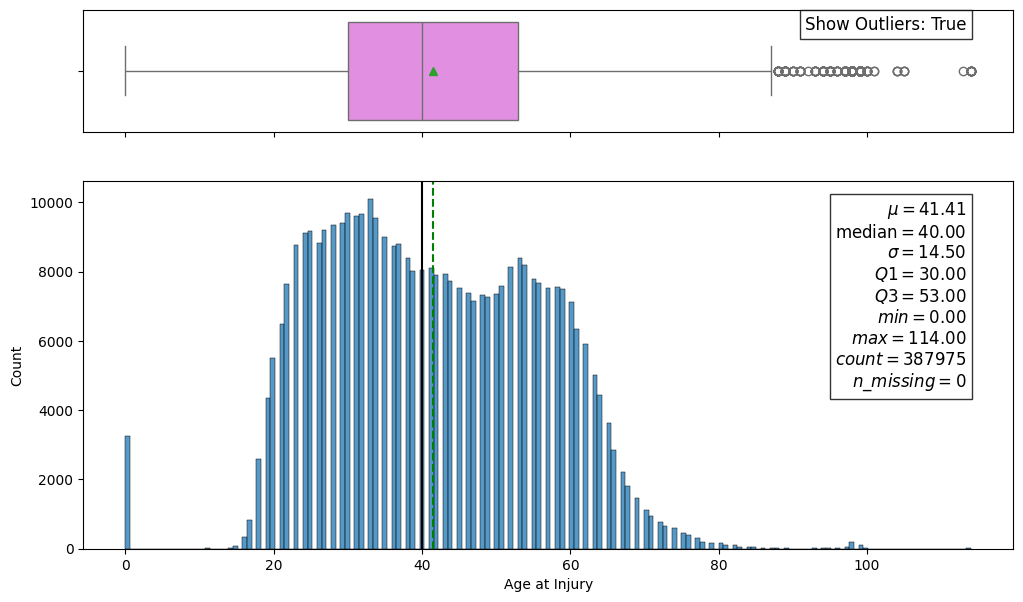

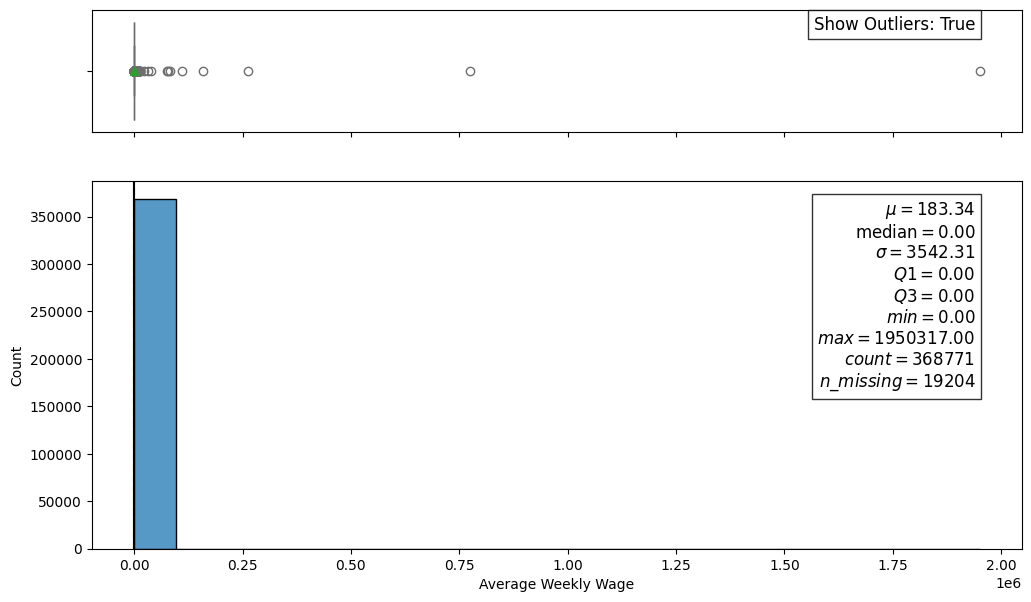

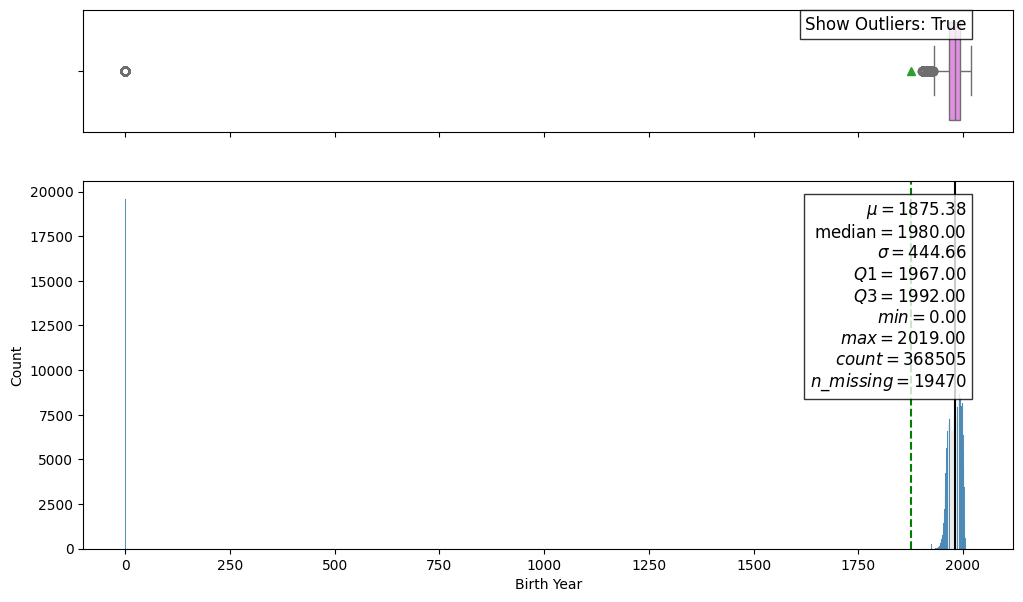

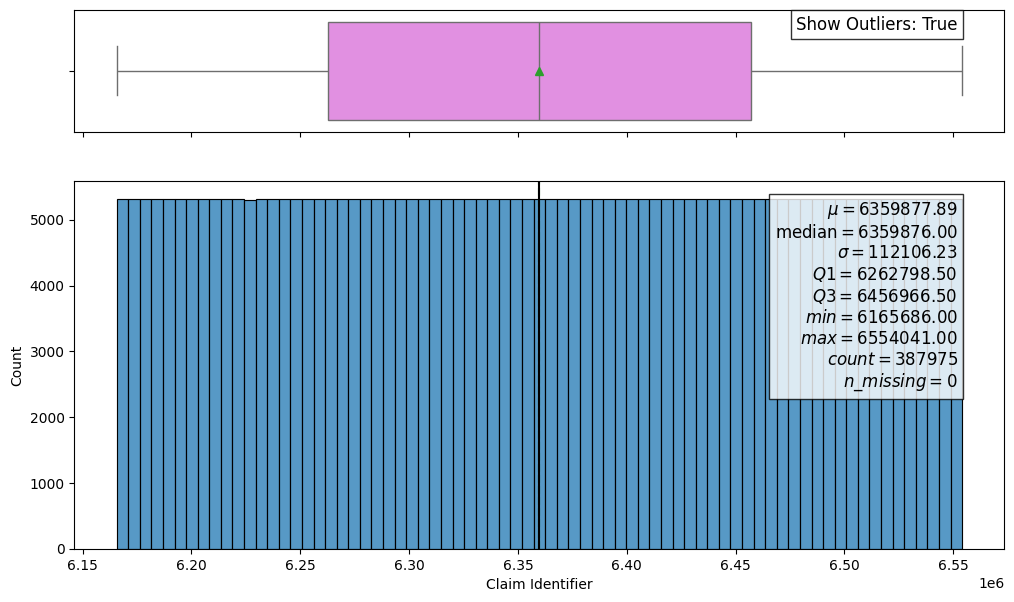

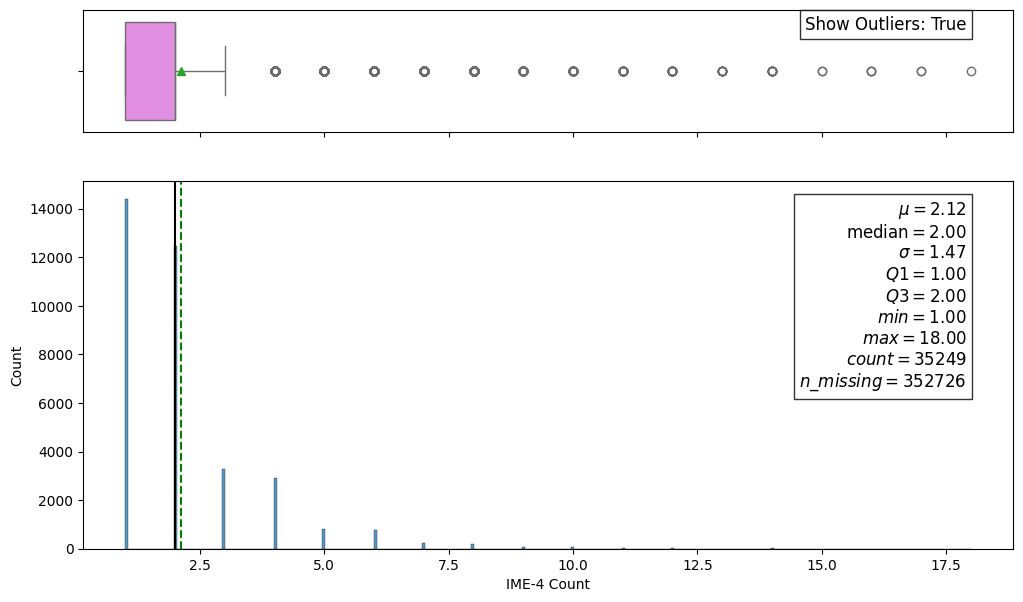

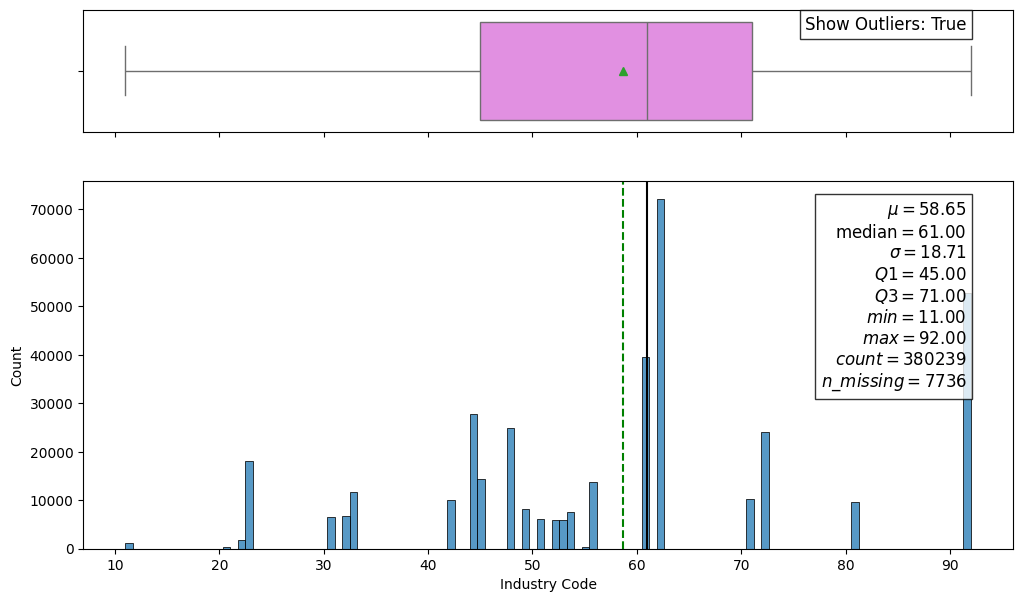

ValueError: List of boxplot statistics and `positions` values must have same the length

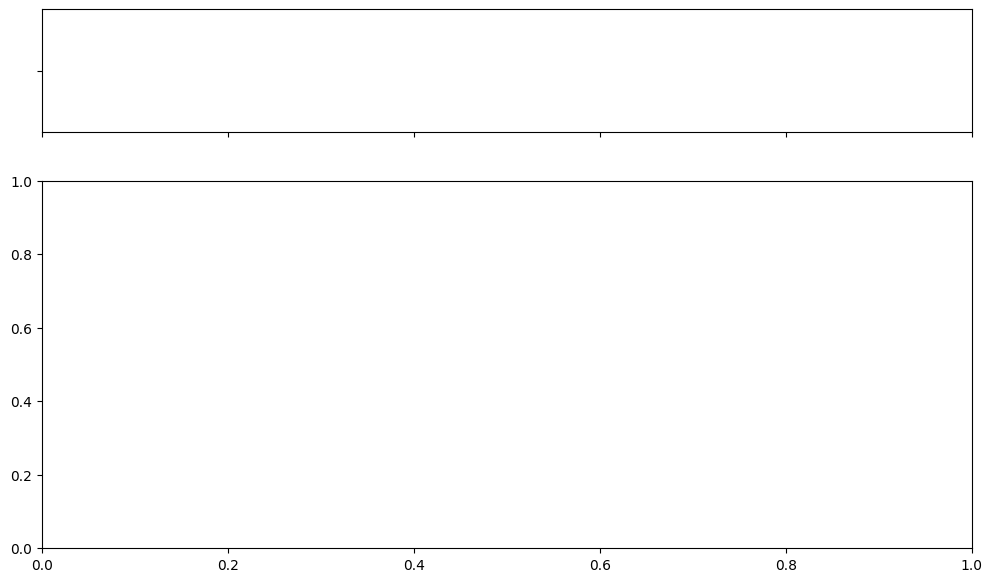

In [90]:
# selecting numerical columns
num_col = data.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(data, item)